<a href="https://colab.research.google.com/github/Victor17in/Alura/blob/main/Python/Explorando_com_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

EAD-Gorjetas

# Importando base de dados

In [1]:
import pandas as pd

In [2]:
pd.read_csv('tips.csv')

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4
...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3
240,27.18,2.00,Yes,Sat,Dinner,2
241,22.67,2.00,Yes,Sat,Dinner,2
242,17.82,1.75,No,Sat,Dinner,2


In [3]:
dados = pd.read_csv('tips.csv')

In [4]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


# Tradução

In [5]:
dados.columns

Index(['total_bill', 'tip', 'dessert', 'day', 'time', 'size'], dtype='object')

In [6]:
renomear = {'total_bill': 'valor_da_conta', 
            'tip': 'gorjeta',
            'dessert': 'sobremesa',
            'day': 'dia_da_semana',
            'time' : 'hora_do_dia',
            'size': 'total_de_pessoas'
}

In [7]:
type(dados)

pandas.core.frame.DataFrame

In [8]:
gorjetas = dados.rename(columns = renomear)

In [9]:
gorjetas.head(2)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3


In [10]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [11]:
sim_não = {'No': 'Não', 'Yes': 'Sim'}

In [12]:
gorjetas.sobremesa.map(sim_não)

0      Não
1      Não
2      Não
3      Não
4      Não
      ... 
239    Não
240    Sim
241    Sim
242    Não
243    Não
Name: sobremesa, Length: 244, dtype: object

In [13]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2


In [14]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_não)

In [15]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Sun,Dinner,2


In [16]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [17]:
dias = {'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur': 'Quinta', 'Fri': 'Sexta'}

In [18]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias)

In [19]:
gorjetas.head(1)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2


In [20]:
gorjetas.hora_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [21]:
hora = {'Dinner': 'Jantar', 'Lunch': 'Almoço'}

In [22]:
gorjetas.hora_do_dia = gorjetas.hora_do_dia.map(hora)

In [23]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


# Importando o Seaborn

In [24]:
!pip install seaborn==0.9.0

     |████████████████████████████████| 215kB 7.6MB/s 
  Found existing installation: seaborn 0.11.1
    Uninstalling seaborn-0.11.1:
      Successfully uninstalled seaborn-0.11.1


In [25]:
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [26]:
!pip show seaborn

Name: seaborn
Version: 0.9.0
Summary: seaborn: statistical data visualization
Home-page: https://seaborn.pydata.org
Author: Michael Waskom
Author-email: mwaskom@nyu.edu
License: BSD (3-clause)
Location: /usr/local/lib/python3.7/dist-packages
Requires: numpy, matplotlib, pandas, scipy
Required-by: missingno


# Análise 1 - Valor da conta e gorjeta

In [27]:
gorjetas.columns

Index(['valor_da_conta', 'gorjeta', 'sobremesa', 'dia_da_semana',
       'hora_do_dia', 'total_de_pessoas'],
      dtype='object')

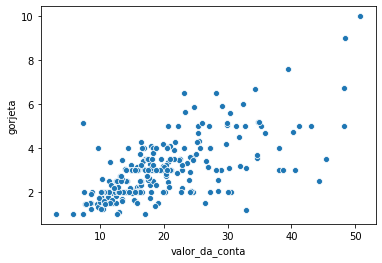

In [28]:
valor_gorjeta = sns.scatterplot(x='valor_da_conta', y='gorjeta', data=gorjetas )

**Visualmente, o valor da gorjeta aumenta conforme aumenta o valor da conta**

In [29]:
print('A base de dados contém {} registros \n'.format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contém 244 registros 

Registros não nulos


valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
hora_do_dia         244
total_de_pessoas    244
dtype: int64

## Criando o campo porcentagem

In [30]:
gorjetas.head(2)

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3


In [31]:
gorjetas['porcentagem'] = gorjetas['gorjeta'] / gorjetas['valor_da_conta']

In [32]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.059447
1,10.34,1.66,Não,Domingo,Jantar,3,0.160542
2,21.01,3.50,Não,Domingo,Jantar,3,0.166587
3,23.68,3.31,Não,Domingo,Jantar,2,0.139780
4,24.59,3.61,Não,Domingo,Jantar,4,0.146808


In [33]:
gorjetas.porcentagem = gorjetas.porcentagem.round(2)

In [34]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


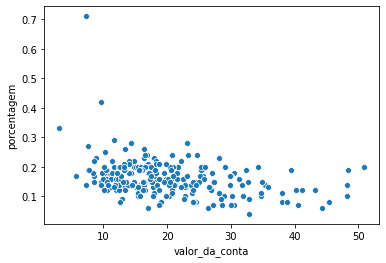

In [35]:
porcentagem_conta = sns.scatterplot(x='valor_da_conta', y = 'porcentagem', data=gorjetas)

**Visualmente o valor da conta não é proporcional ao valor da gorjeta**

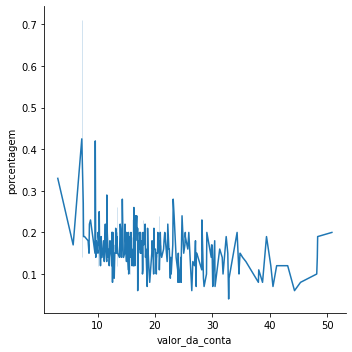

In [36]:
porcentagem_conta_linha = sns.relplot(x='valor_da_conta', y = 'porcentagem', kind='line', data=gorjetas)

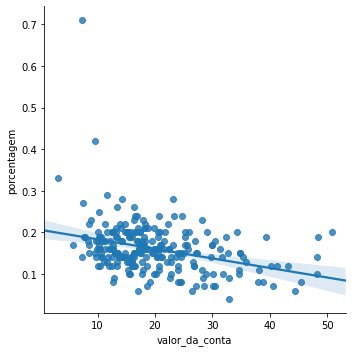

In [37]:
sns.lmplot(x='valor_da_conta', y='porcentagem', data=gorjetas)

# Análise 2 - Sobremesa

In [39]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [46]:
gorjetas[gorjetas.sobremesa=='Sim'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [47]:
gorjetas[gorjetas.sobremesa=='Não'].describe()

,valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


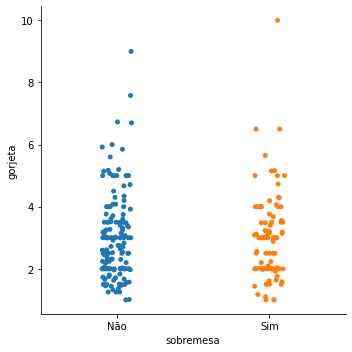

In [48]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

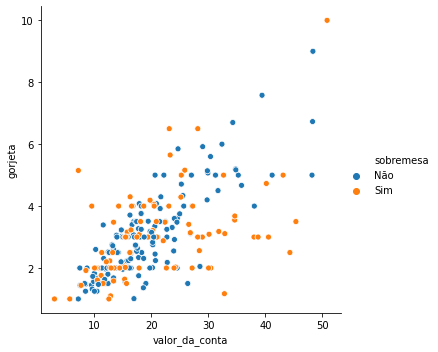

In [43]:
sns.relplot(x='valor_da_conta', y = 'gorjeta', hue='sobremesa', data=gorjetas)

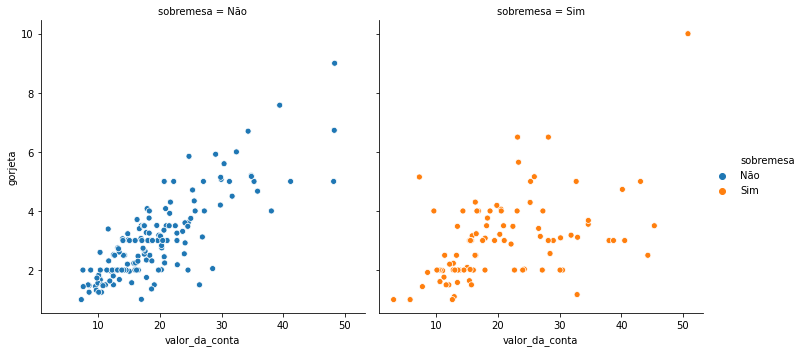

In [49]:
sns.relplot(x='valor_da_conta', y = 'gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

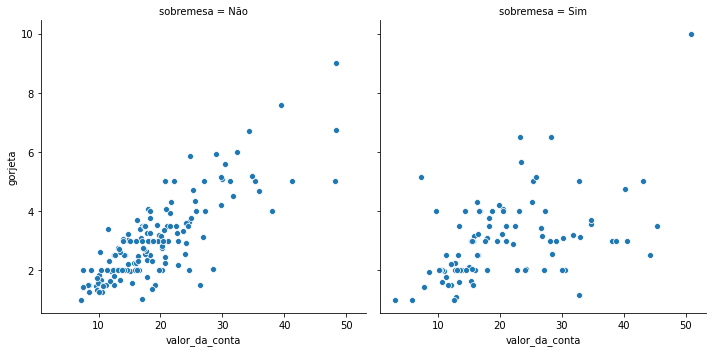

In [44]:
sns.relplot(x='valor_da_conta', y = 'gorjeta', col='sobremesa', data=gorjetas)

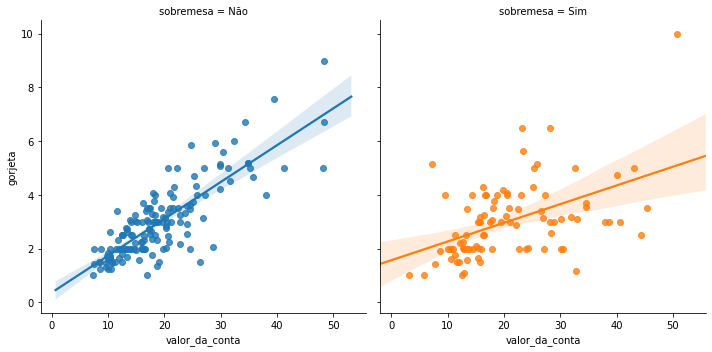

In [50]:
sns.lmplot(x='valor_da_conta', y = 'gorjeta', hue='sobremesa', col='sobremesa', data=gorjetas)

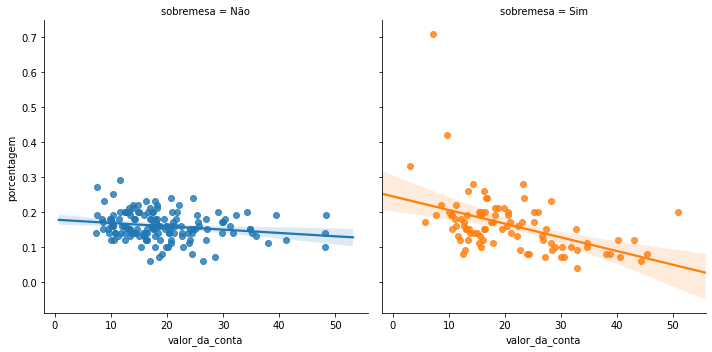

In [51]:
sns.lmplot(x='valor_da_conta', y = 'porcentagem', hue='sobremesa', col='sobremesa', data=gorjetas)

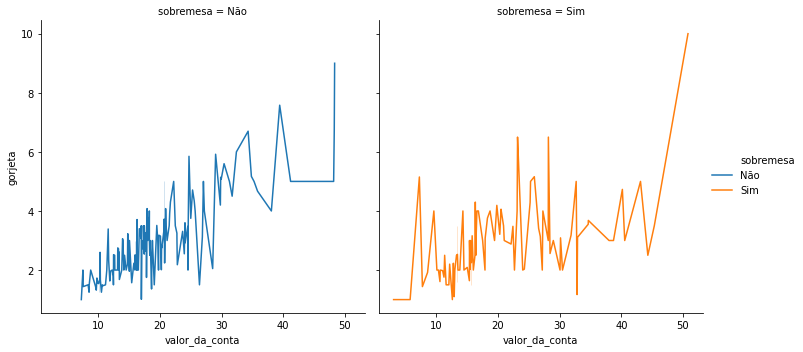

In [53]:
sns.relplot(x='valor_da_conta', y = 'gorjeta', col='sobremesa', hue='sobremesa', kind='line', data=gorjetas)

**Visulamente, parece que temos poucas diferenças de quem pediu a sobremesa e de quem não pediu a sobremesa**

## Teste de hipótese

**H<sup>null<sup>**
>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

**H<sup>alt<sup>**
>**A distribuição da taxa da gorjeta não é a mesma nos dois grupos**

In [54]:
from scipy.stats import ranksums

In [56]:
sobremesa = gorjetas.query("sobremesa == 'Sim'").porcentagem

In [57]:
sem_sobremesa = gorjetas.query("sobremesa == 'Não'").porcentagem

In [60]:
r = ranksums(sobremesa, sem_sobremesa)

In [61]:
print('O valor do p-value é {}'.format(r.pvalue))

O valor do p-value é 0.5266635660124415


**H<sup>null<sup>**
>**A distribuição da taxa da gorjeta é a mesma nos dois grupos**

# Análise 3 - Dia da semana

In [62]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [63]:
gorjetas.dia_da_semana.unique()

array(['Domingo', 'Sábado', 'Quinta', 'Sexta'], dtype=object)

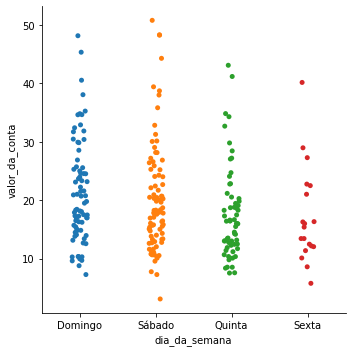

In [64]:
sns.catplot(x='dia_da_semana', y='valor_da_conta', data=gorjetas)

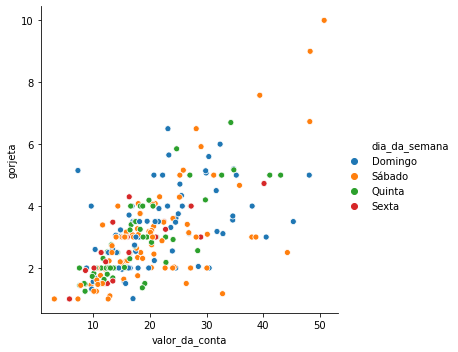

In [66]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue= 'dia_da_semana',data=gorjetas)

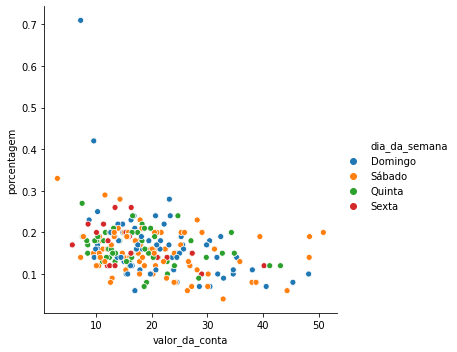

In [68]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue= 'dia_da_semana',data=gorjetas)

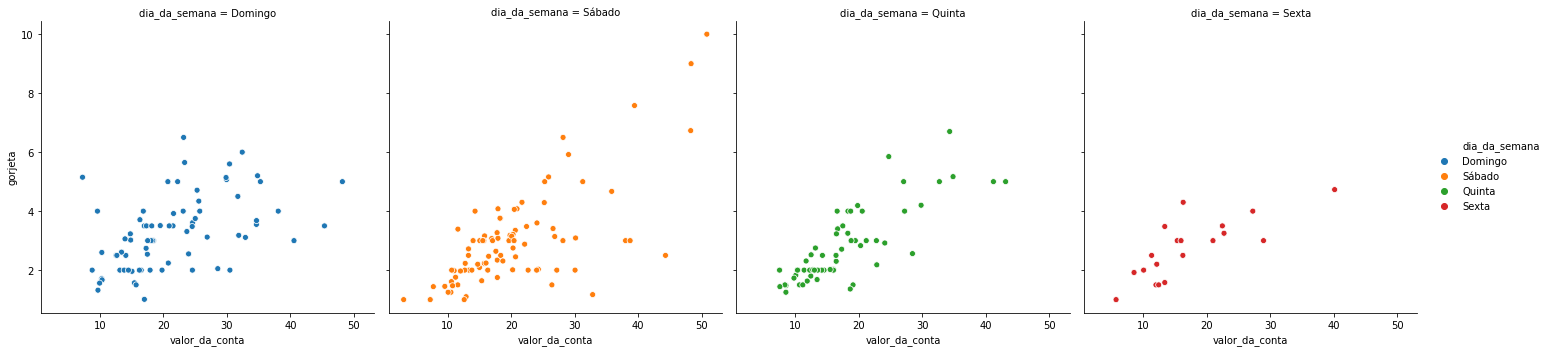

In [70]:
sns.relplot(x='valor_da_conta', y='gorjeta', hue= 'dia_da_semana', col='dia_da_semana', data=gorjetas)

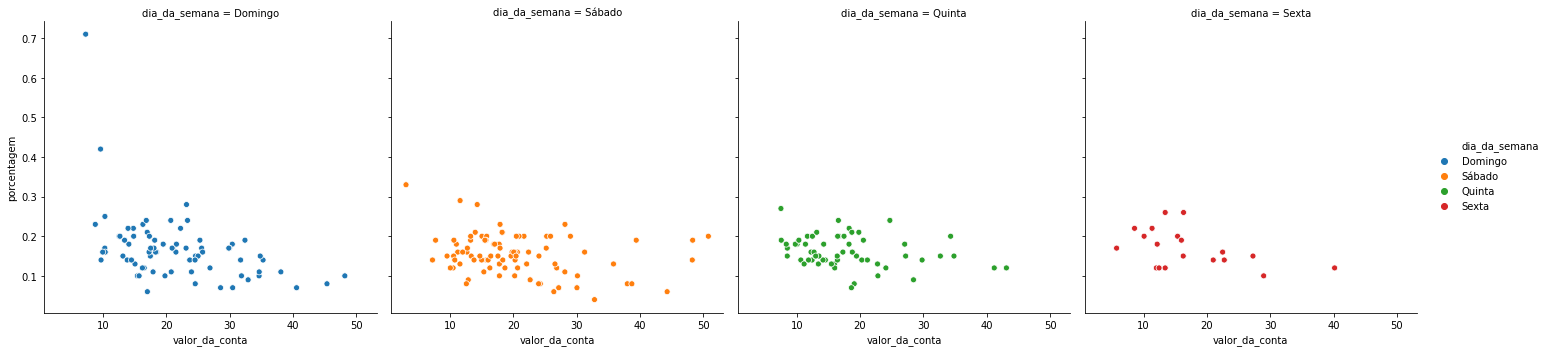

In [71]:
sns.relplot(x='valor_da_conta', y='porcentagem', hue= 'dia_da_semana', col='dia_da_semana', data=gorjetas)

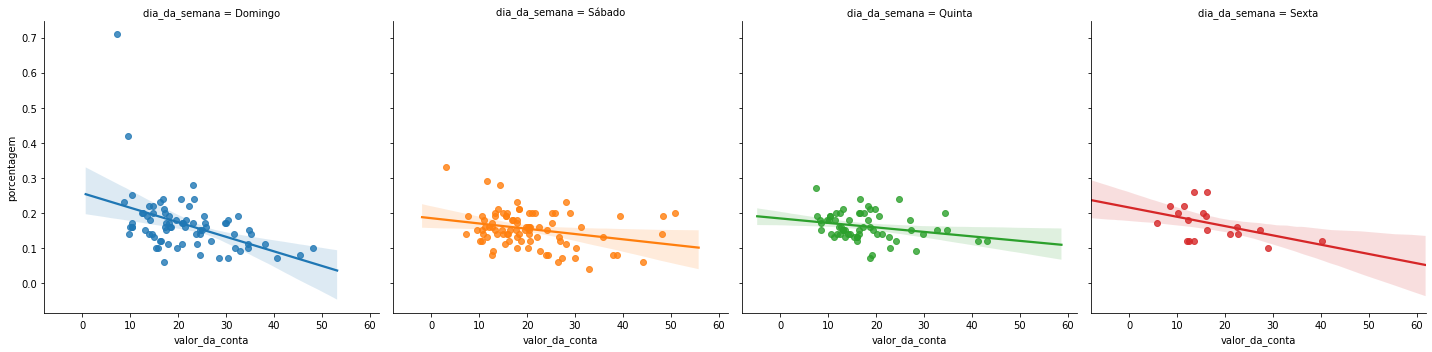

In [72]:
sns.lmplot(x='valor_da_conta', y='porcentagem', hue= 'dia_da_semana', col='dia_da_semana', data=gorjetas)

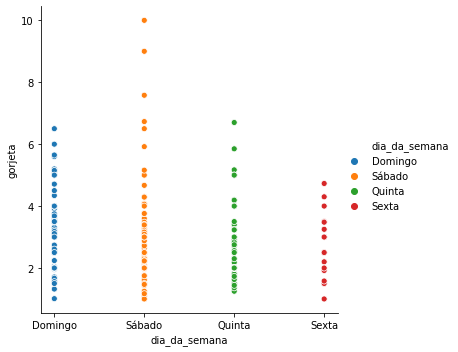

In [65]:
sns.relplot(x='dia_da_semana', y='gorjeta', hue= 'dia_da_semana',data=gorjetas)

In [74]:
media_geral_gortetas = gorjetas.gorjeta.mean()

In [75]:
print('A média geral das gorjetas pe de {}'.format(media_geral_gortetas))

A média geral das gorjetas pe de 2.9982786885245902


In [88]:
gorjetas.groupby(['dia_da_semana']).mean()[['valor_da_conta', 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [79]:
print('Frequência dos dias')
gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

## Teste de hipótese

**H<sup>null<sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**

**H<sup>alt<sup>**
>**A distribuição do valor da conta não é igual no sábado e no domingo**

In [82]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").valor_da_conta

In [83]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").valor_da_conta

In [86]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print('O valor do p-value é {}'.format(r2.pvalue))

O valor do p-value é 0.3576728477868443


**H<sup>null<sup>**
>**A distribuição do valor da conta é igual no sábado e no domingo**

# Análise 4 - Hora do dia

In [89]:
gorjetas.head()

,valor_da_conta,gorjeta,sobremesa,dia_da_semana,hora_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16
2,21.01,3.50,Não,Domingo,Jantar,3,0.17
3,23.68,3.31,Não,Domingo,Jantar,2,0.14
4,24.59,3.61,Não,Domingo,Jantar,4,0.15


In [90]:
gorjetas.hora_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

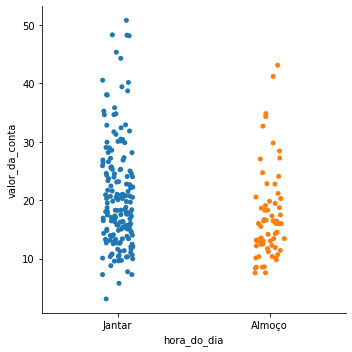

In [91]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

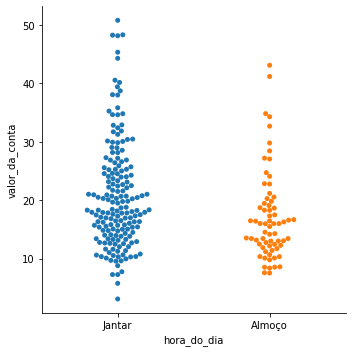

In [92]:
sns.catplot(x='hora_do_dia', y='valor_da_conta', kind= 'swarm', data=gorjetas)

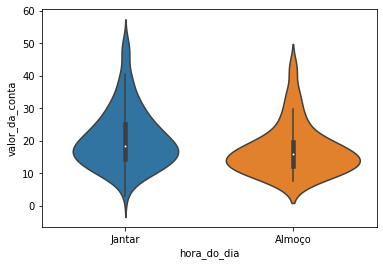

In [94]:
sns.violinplot(x='hora_do_dia', y='valor_da_conta', data=gorjetas)

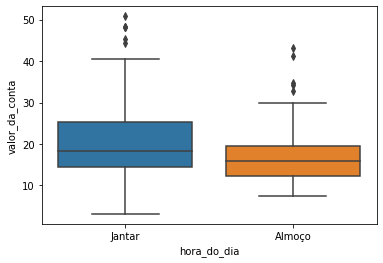

In [95]:
sns.boxplot(x='hora_do_dia', y= 'valor_da_conta', data= gorjetas)

In [97]:
almoco = gorjetas.query("hora_do_dia == 'Almoço'").valor_da_conta

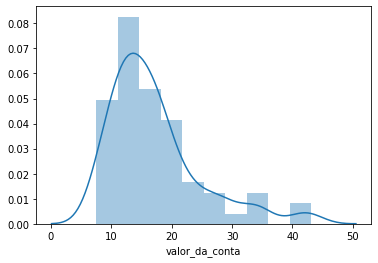

In [98]:
sns.distplot(almoco)

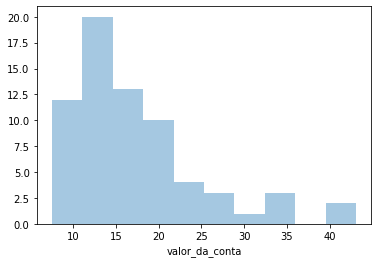

In [99]:
sns.distplot(almoco, kde= False)

In [100]:
jantar = gorjetas.query("hora_do_dia == 'Jantar'").valor_da_conta

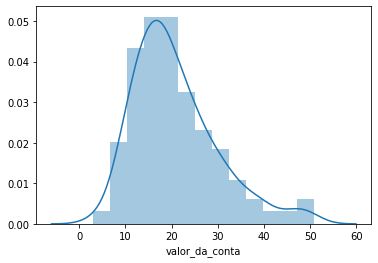

In [101]:
sns.distplot(jantar)

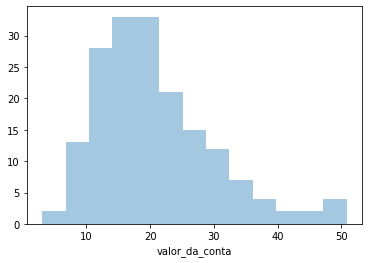

In [102]:
sns.distplot(jantar, kde= False)

## Teste de hipótese

In [104]:
gorjetas.groupby(['hora_do_dia']).mean()[["valor_da_conta", 'gorjeta', 'porcentagem']]

,valor_da_conta,gorjeta,porcentagem
hora_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


**H<sup>null<sup>**
>**A distribuição do valor da conta é igual no jantar e no almoço**

**H<sup>alt<sup>**
>**A distribuição do valor da conta não é igual no jantar e no almoço**

In [106]:
r3 = ranksums(jantar, almoco)

In [107]:
print('O valor do p-value é de {}'.format(r3.pvalue))

O valor do p-value é de 0.0011791039723641672


**H<sup>alt<sup>**
>**A distribuição do valor da conta não é igual no jantar e no almoço**

## Teste de hipótese 2

**H<sup>null<sup>**
>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**

**H<sup>alt<sup>**
>**A distribuição da taxa da gorjeta não é igual no jantar e no almoço**

In [109]:
porcentagem_almoco = gorjetas.query("hora_do_dia == 'Almoço'").porcentagem

In [110]:
porcentagem_jantar = gorjetas.query("hora_do_dia == 'Jantar'").porcentagem

In [113]:
r4 = ranksums(porcentagem_almoco, porcentagem_jantar)

In [114]:
print('O valor do p-value é de {}'.format(r4.pvalue))

O valor do p-value é de 0.2602493995587126


**H<sup>null<sup>**
>**A distribuição da taxa da gorjeta é igual no jantar e no almoço**